In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

# Importing the dataset
Note :
- the dataset was in a folder called my_dataset

In [3]:
def unpickle(file):
    # A function to unpickle the data files
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# Define the folder path and the file names
folder = 'my_dataset'
files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

In [5]:
# Initialize empty lists for images and labels
images = []
labels = []

In [6]:
# Loop through the files and append the images and labels to the lists
for file in files:
    # Unpickle the file and get the data and labels
    data = unpickle(os.path.join(folder, file))
    images.append(data[b'data'])
    labels.append(data[b'labels'])

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocessing the imported dataset

In [7]:

# Convert the lists to numpy arrays
images = np.concatenate(images)
labels = np.concatenate(labels)

# Reshape the images to (32, 32, 3) format
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize the images to have values between 0 and 1
images = images / 255.0

In [8]:

# Split the data into training and validation sets
train_images, val_images = images[:48000], images[48000:]
train_labels, val_labels = labels[:48000], labels[48000:]


# Training the model

In [9]:

# Define the model architecture using keras sequential API
model = keras.Sequential([
    # A convolutional layer with 32 filters, 3x3 kernel size, relu activation and input shape of (32, 32, 3)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # A max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    # A convolutional layer with 64 filters, 3x3 kernel size and relu activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # A max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    # A convolutional layer with 64 filters, 3x3 kernel size and relu activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # A flatten layer to convert the output to a 1D vector
    layers.Flatten(),
    # A dense layer with 64 units and relu activation
    layers.Dense(64, activation='relu'),
    # A dense layer with 10 units and softmax activation for the output
    layers.Dense(10, activation='softmax')
])

In [10]:

# Compile the model using adam optimizer, sparse categorical crossentropy loss and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the training set
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
750/750 [==============================] - 33s 41ms/step - loss: 1.6139 - accuracy: 0.4114 - val_loss: 1.3349 - val_accuracy: 0.5345
Epoch 2/20
750/750 [==============================] - 28s 38ms/step - loss: 1.2382 - accuracy: 0.5619 - val_loss: 1.1483 - val_accuracy: 0.6045
Epoch 3/20
750/750 [==============================] - 29s 38ms/step - loss: 1.0934 - accuracy: 0.6127 - val_loss: 1.0673 - val_accuracy: 0.6325
Epoch 4/20
750/750 [==============================] - 28s 38ms/step - loss: 0.9912 - accuracy: 0.6528 - val_loss: 1.0093 - val_accuracy: 0.6610
Epoch 5/20
750/750 [==============================] - 28s 37ms/step - loss: 0.9214 - accuracy: 0.6769 - val_loss: 0.9400 - val_accuracy: 0.6750
Epoch 6/20
750/750 [==============================] - 29s 38ms/step - loss: 0.8587 - accuracy: 0.6990 - val_loss: 0.9041 - val_accuracy: 0.6890
Epoch 7/20
750/750 [==============================] - 29s 39ms/step - loss: 0.8070 - accuracy: 0.7180 - val_loss: 0.8557 - val_accuracy:

# Plot the training and validation accuracy and loss curves

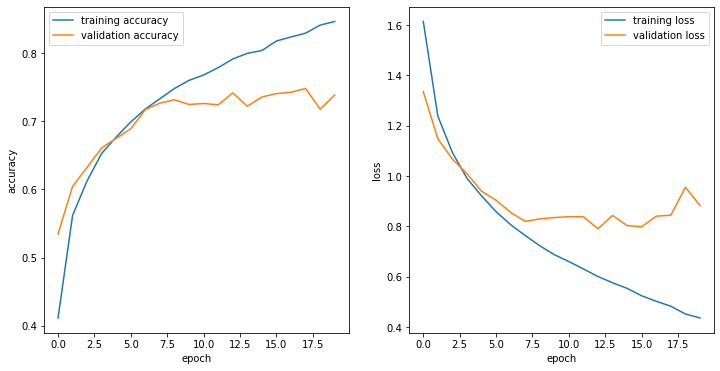

In [11]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evaluating the model

In [12]:

# Evaluate the model using the validation set
val_loss, val_acc = model.evaluate(val_images, val_labels)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_acc:.4f}')


63/63 [==============================] - 1s 9ms/step - loss: 0.8829 - accuracy: 0.7385
Validation loss: 0.8829
Validation accuracy: 0.7385


# Testing the model on a New Photo

In [28]:


# Load the image file
image = Image.open('testing-image.jpg')

# Resize the image to (32, 32)
image = image.resize((32, 32))

# Convert the image to a numpy array
image_array = np.array(image)

# Reshape the image to (1, 32, 32, 3) format
image_array = image_array.reshape(1, 32, 32, 3)

# Normalize the image to have values between 0 and 1
image_array = image_array / 255.0

1/1 [==============================] - 0s 22ms/step
Predicted class: airplane, Probability: 0.8113


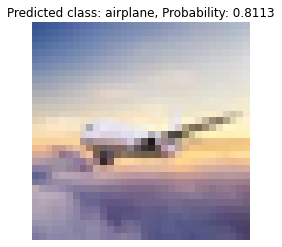

In [29]:
# Get the predicted class probabilities
probs = model.predict(image_array)[0]

# Get the index of the highest probability class
predicted_class = np.argmax(probs)

# Get the name of the predicted class
class_name = class_names[predicted_class]

# Print the predicted class and its probability
print(f'Predicted class: {class_name}, Probability: {probs[predicted_class]:.4f}')

# Display the image and the predicted class
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {class_name}, Probability: {probs[predicted_class]:.4f}')
plt.show()

# Saving the model
Saving the model using PKL lib in '.h5' format so it can be used again in doing Predictions or even a web app

In [16]:
# Save the model to a file
model.save('my_model.h5')